# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('df_dummies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   qtd_filhos                              16650 non-null  int64  
 2   idade                                   16650 non-null  float64
 3   tempo_emprego                           16650 non-null  float64
 4   possui_celular                          16650 non-null  int64  
 5   possui_fone_comercial                   16650 non-null  int64  
 6   possui_fone                             16650 non-null  int64  
 7   possui_email                            16650 non-null  int64  
 8   qt_pessoas_residencia                   16650 non-null  float64
 9   mau                                     16650 non-null  bool   
 10  sexo_F                                  16650 non-null  in

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [3]:
#1
clf = DecisionTreeClassifier()

In [4]:
#2
y = df.mau
X = df.drop('mau',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
clf.fit(X_train, y_train)


DecisionTreeClassifier()

[Text(0.5783417718209705, 0.98, 'Unnamed: 0 <= 16470.0\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Reprovados'),
 Text(0.5738799759481317, 0.94, 'tempo_emprego <= 2.848\ngini = 0.024\nsamples = 11530\nvalue = [11392, 138]\nclass = Reprovados'),
 Text(0.2692502091466815, 0.9, 'idade <= 30.175\ngini = 0.034\nsamples = 4222\nvalue = [4149, 73]\nclass = Reprovados'),
 Text(0.11795872838817624, 0.86, 'idade <= 30.137\ngini = 0.08\nsamples = 430\nvalue = [412, 18]\nclass = Reprovados'),
 Text(0.10122699386503067, 0.82, 'Unnamed: 0 <= 13411.0\ngini = 0.068\nsamples = 423\nvalue = [408, 15]\nclass = Reprovados'),
 Text(0.081148912437256, 0.78, 'idade <= 28.567\ngini = 0.03\nsamples = 331\nvalue = [326, 5]\nclass = Reprovados'),
 Text(0.07668711656441718, 0.74, 'gini = 0.0\nsamples = 235\nvalue = [235, 0]\nclass = Reprovados'),
 Text(0.08561070831009482, 0.74, 'idade <= 28.595\ngini = 0.099\nsamples = 96\nvalue = [91, 5]\nclass = Reprovados'),
 Text(0.081148912437256, 0.7, 'gi

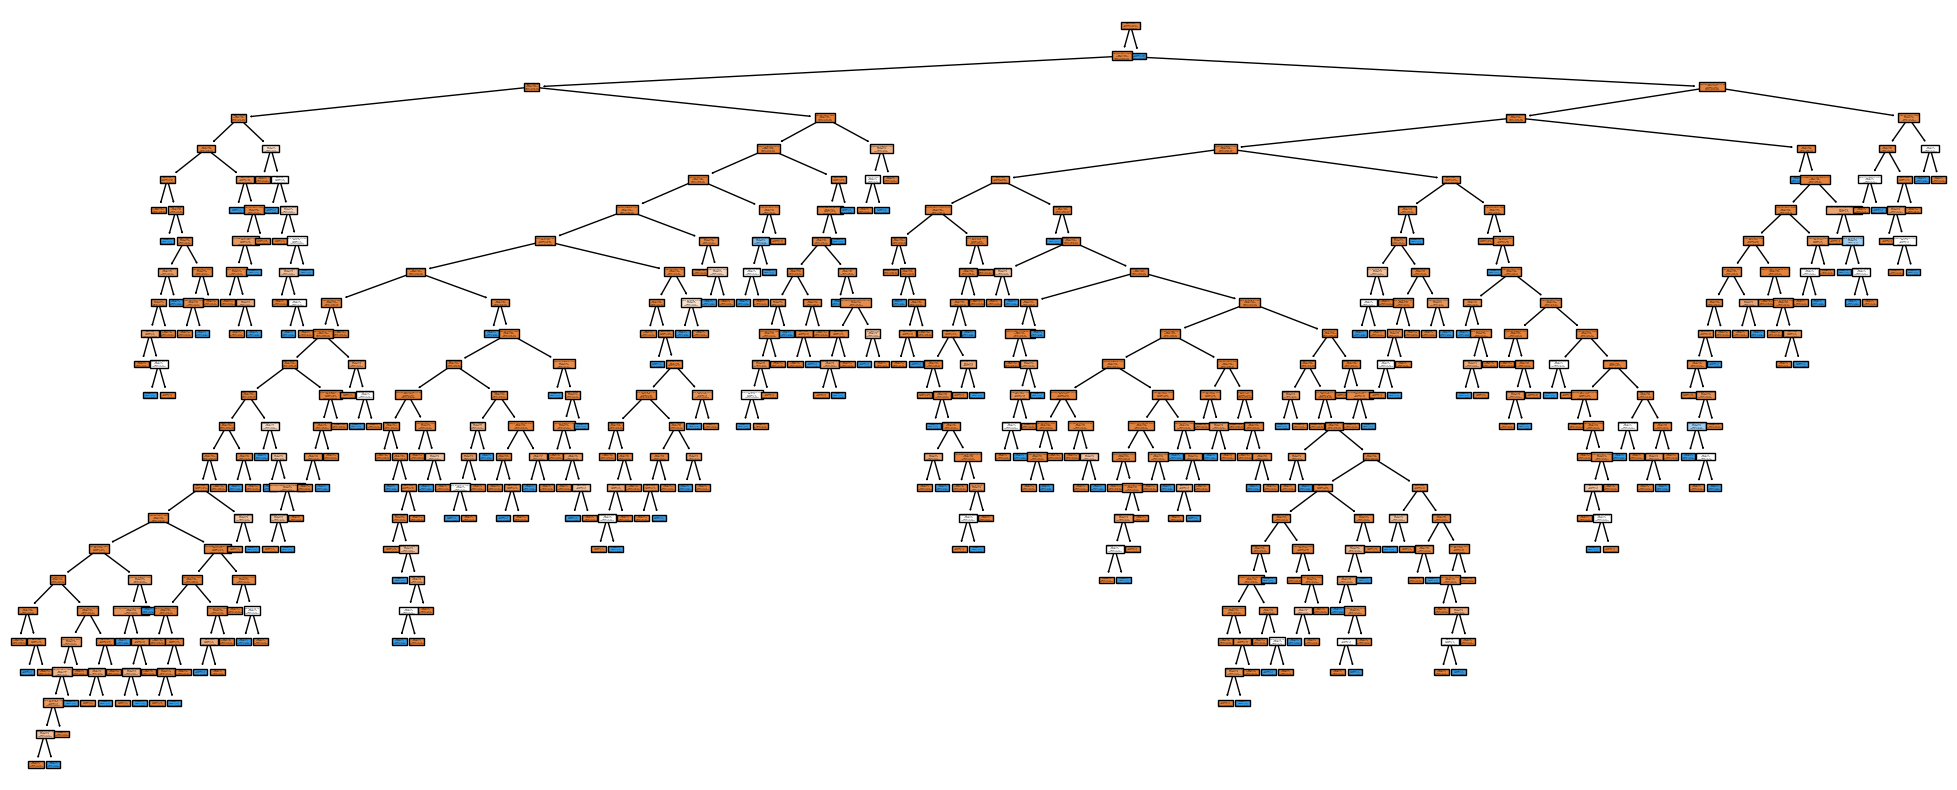

In [5]:
#3
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Reprovados', 'Aprovados'],
          feature_names=X.columns)

In [9]:
#4
predict = clf.predict(X_test)
cm = confusion_matrix(y_train, predict)

cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

cm_plot.plot()

ValueError: Found input variables with inconsistent numbers of samples: [11655, 4995]

In [10]:
#5
accuracy_score(y_test, predict)

0.9785785785785786

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [ ]:
predict_train = clf.predict(X_train)
cm = confusion_matrix(y_train, predict_train)

cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

cm_plot.plot()

In [12]:
accuracy_score(y_train, predict_train)

1.0

In [ ]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,random_state=123)